In [ ]:
!pip3 install pycaret[full]

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Database used
# https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023?resource=download

# Import locally from colab
# df = pd.read_csv('/content/Global YouTube Statistics.csv',encoding='unicode_escape')


# Import from drive
df = pd.read_csv("/content/drive/MyDrive/ponderadas/youtube-statistics/GlobalYouTubeStatistics.csv",encoding='unicode_escape')

In [ ]:
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
from pycaret.regression import *

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
cols_drop = ['rank',
              'Youtuber',
              'subscribers',
              'video views',
              'category',
              'Title',
              'uploads',
              'Country',
              'Abbreviation',
              'channel_type',
              'video_views_rank',
              'country_rank',
              'channel_type_rank',
              # 'video_views_for_the_last_30_days',
              # 'lowest_monthly_earnings',
              # 'highest_monthly_earnings',
              # 'lowest_yearly_earnings',
              # 'highest_yearly_earnings',
              'subscribers_for_last_30_days',
              'created_year',
              'created_month',
              'created_date',
              'Gross tertiary education enrollment (%)',
              'Population',
              'Unemployment rate',
              'Urban_population',
              'Latitude', 'Longitude'
]

In [ ]:
s = setup(
    data=df,
    target='highest_yearly_earnings',
    ignore_features=cols_drop,
    normalize = True,
    normalize_method = 'zscore',
    transformation = True,
    numeric_imputation = 'mean',
    remove_outliers = True,
    outliers_method = 'lof'
)

,Description,Value
0,Session id,7567
1,Target,highest_yearly_earnings
2,Target type,Regression
3,Original data shape,"(995, 28)"
4,Transformed data shape,"(960, 5)"
5,Transformed train set shape,"(661, 5)"
6,Transformed test set shape,"(299, 5)"
7,Ignore features,23
8,Numeric features,4
9,Rows with missing values,44.3%


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,106598.8899,4216833285834.6206,703428.3813,0.8925,0.7421,0.0185,0.3420
gbr,Gradient Boosting Regressor,178783.7209,4126142761814.1846,862028.8150,0.8925,2.6627,2233.4722,0.2290
xgboost,Extreme Gradient Boosting,164505.0879,4132042432512.0000,879433.7359,0.8924,1.9554,417.8600,0.1200
dt,Decision Tree Regressor,159624.0793,4129893651600.2393,879178.0028,0.8924,0.0944,0.0261,0.1000
catboost,CatBoost Regressor,169880.8964,4274762397456.7378,837514.0964,0.8922,2.9752,7212.9424,2.0570
rf,Random Forest Regressor,160894.7768,4603426981143.6826,902518.7945,0.8916,0.5122,0.0236,0.5110
knn,K Neighbors Regressor,239852.0176,6393976811417.5996,1291581.0016,0.8873,0.2371,0.0358,0.0630
ada,AdaBoost Regressor,1537527.2105,7512823109431.5762,2202136.6227,0.8694,4.9541,1065914.7354,0.1850
lightgbm,Light Gradient Boosting Machine,609754.8402,20160722695270.5508,2962920.7131,0.8471,2.8886,10253.7868,0.3970
lr,Linear Regression,5251141.8500,80502969912524.7969,8181471.6500,0.4952,4.6778,87391.6453,0.0570


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

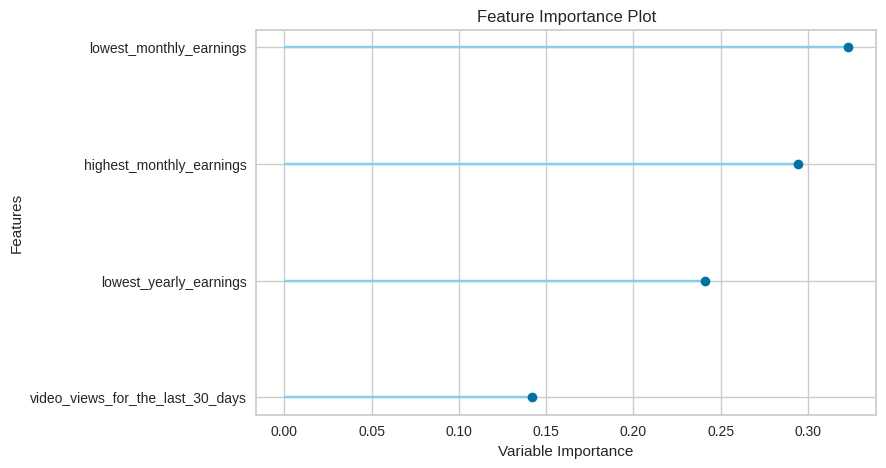

In [ ]:
# plot feature importance
plot_model(best_model, plot = 'feature')

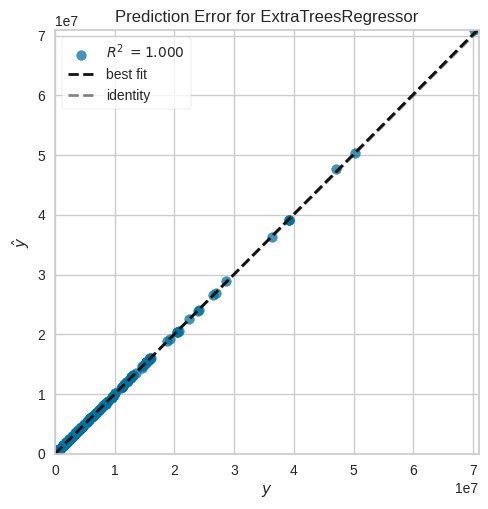

In [ ]:
# plot error
plot_model(best_model, plot = 'error')

In [ ]:
# Salvando o modelo
save_model(best_model, 'modelo_extra')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['video_views_for_the_last_30_days',
                                              'lowest_monthly_earnings',
                                              'highest_monthly_earnings',
                                              'lowest_yearly_earnings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(method='lof',
                                                                random_state=7567))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWr

## Predição

In [ ]:
# predict on test set
holdout_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,22079.0863,4320421204.2913,65729.9110,0.9999,0.5127,0.0120


In [ ]:
# show predictions df
holdout_pred.head()

,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,prediction_label
201,429692000.0,107400.0,1700000.0,1300000.0,20600000.0,20460000.0
108,331473984.0,82900.0,1300000.0,994400.0,15900000.0,15944000.0
676,250995008.0,62700.0,1000000.0,753000.0,12000000.0,12073000.0
550,45698000.0,11400.0,182800.0,137100.0,2200000.0,2200000.0
357,52330000.0,13100.0,209300.0,157000.0,2500000.0,2500000.0


In [ ]:
# copy data and drop charges

new_data = df.copy()
new_data.drop(cols_drop, axis=1, inplace=True)
new_data.drop('highest_yearly_earnings', axis=1, inplace=True)
new_data.head()

,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings
0,2.258000e+09,564600.0,9000000.00,6800000.00
1,1.200000e+01,0.0,0.05,0.04
2,1.348000e+09,337000.0,5400000.00,4000000.00
3,1.975000e+09,493800.0,7900000.00,5900000.00
4,1.824000e+09,455900.0,7300000.00,5500000.00


In [ ]:
# predict model on new_data
predictions = predict_model(best_model, data = new_data)
predictions.head()

,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,prediction_label
0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08
1,1.200000e+01,0.0,0.05,0.04,6.196000e-01
2,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07
3,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07
4,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07


## Criando API

In [ ]:
# create api
create_api(best_model, api_name = 'api_model')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python api_model.py


In [ ]:
# check out the .py file created with this magic command
%load api_model.py

In [ ]:
%load api_model.pkl

SyntaxError: ignored

## Criando um Dockerfile

In [ ]:
create_docker('api_model')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
%load DockerFile

ValueError: ignored

In [ ]:
# check out the requirements file created with this magic command
%load requirements.txt

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
deploy_model(_model, model_name = 'api_adaBoost_on_aws',
            platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws